# QUESTION 1

## Getting the Median

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Electricity Price dataset.csv")

# Convert reservoir level to numeric (if needed)
df["Reservoir level"] = pd.to_numeric(df["Reservoir level"], errors="coerce")

# Compute the median reservoir level
median_reservoir = df["Reservoir level"].median()

# Categorize reservoir levels into "High" and "Low"
df["Reservoir Category"] = df["Reservoir level"].apply(lambda x: "High" if x >= median_reservoir else "Low")

# Compute the average electricity spot price and gas price for each category
category_averages = df.groupby("Reservoir Category")[["Electricity_Spot price", "Gas_price"]].mean()

# Display results
print(category_averages)


                    Electricity_Spot price  Gas_price
Reservoir Category                                   
High                             41.352950  27.630613
Low                              73.194382  59.950344


C:\Users\grela\AppData\Local\Temp\ipykernel_28448\3867342189.py:4: DtypeWarning: Columns (14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Electricity Price dataset.csv")


In [9]:
print(df.columns)

Index(['Time Stamp', 'Oil_price_euro', 'Coal_price_euro', 'Reservoir level',
       'Gas_price', 'Dollar price', 'Consumption', 'Production',
       'Precipitation', 'Electrical Load', 'Electricity_Actual price', 'Wind',
       'Temperature', 'Electricity_Spot price', 'hour', 'day', 'month', 'year',
       'week', 'day_of_week', 'Reservoir Category'],
      dtype='object')


In [23]:
df.isna().sum()

Time Stamp                  0
Oil_price_euro              0
Coal_price_euro             0
Reservoir_level             0
Gas_price                   0
Dollar price                0
Consumption                 0
Production                  0
Precipitation               0
Electrical Load             0
Electricity_Actual price    0
Wind                        0
Temperature                 0
Spot_price                  0
hour                        0
day                         0
month                       0
year                        0
week                        0
day_of_week                 0
Reservoir_category          0
dtype: int64

In [25]:
df.iloc[11923:,14:].sample(20) 

,hour,day,month,year,week,day_of_week,Reservoir_category
35167,7,27,10,2021,43,2,Medium
14569,1,22,6,2019,25,5,Medium
30860,20,30,4,2021,17,4,Low
33532,4,20,8,2021,33,4,Medium
22124,20,1,5,2020,18,4,Low
20638,22,29,2,2020,9,5,Medium
29903,23,21,3,2021,11,6,Medium
16863,15,25,9,2019,39,2,High
35221,13,29,10,2021,43,4,Medium
37486,22,31,1,2022,5,0,Low


C:\Users\grela\AppData\Local\Temp\ipykernel_33824\571924401.py:6: DtypeWarning: Columns (14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Electricity Price dataset.csv")


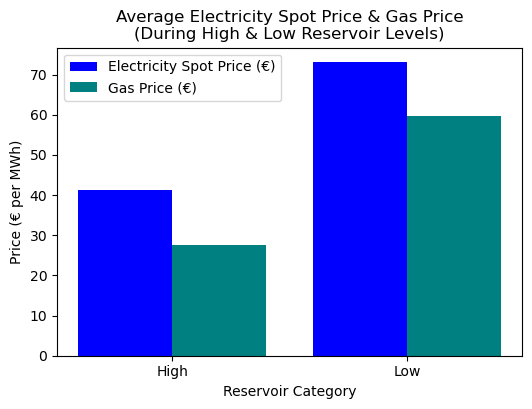

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv("Electricity Price dataset.csv")

# Ensure correct column names by stripping spaces
df.columns = df.columns.str.strip()

# Define reservoir level categories using the median split method
median_reservoir = df["Reservoir level"].median()

df["Reservoir Category"] = np.where(df["Reservoir level"] > median_reservoir, "High", "Low")

# Calculate average prices for each category
avg_prices = df.groupby("Reservoir Category")[["Electricity_Spot price", "Gas_price"]].mean()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(6, 4))

bar_width = 0.4
x_labels = avg_prices.index
x = np.arange(len(x_labels))

ax.bar(x - bar_width/2, avg_prices["Electricity_Spot price"], bar_width, label="Electricity Spot Price (€)", color="blue")
ax.bar(x + bar_width/2, avg_prices["Gas_price"], bar_width, label="Gas Price (€)", color="teal")

# Labels and titles
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_xlabel("Reservoir Category")
ax.set_ylabel("Price (€ per MWh)")
ax.set_title("Average Electricity Spot Price & Gas Price\n(During High & Low Reservoir Levels)")
ax.legend()

# Show the plot
plt.show()


In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Electricity Price dataset.csv")

# Convert reservoir level to numeric (if needed)
df["Reservoir level"] = pd.to_numeric(df["Reservoir level"], errors="coerce")

# Compute the 50th percentile (median) for quantile-based binning
q50 = df["Reservoir level"].quantile(0.50)

# Classify into "High" and "Low" based on the 75th percentile
df["Reservoir Category"] = df["Reservoir level"].apply(lambda x: "High" if x >= q50 else "Low")

# Compute the average electricity spot price and gas price for each category
category_averages = df.groupby("Reservoir Category")[["Electricity_Spot price", "Gas_price"]].mean()

# Display results
print(category_averages)


                    Electricity_Spot price  Gas_price
Reservoir Category                                   
High                             41.352950  27.630613
Low                              73.194382  59.950344


C:\Users\greth\AppData\Local\Temp\ipykernel_9528\230850992.py:4: DtypeWarning: Columns (14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Electricity Price dataset.csv")


## Getting the Mean

In [6]:
import pandas as pd

# Load the dataset (ensure the path is correct and using a raw string for Windows paths)
df = pd.read_csv(r"C:\Users\greth\OneDrive\Desktop\NOROFF-DATA SCIENC\2ND YEAR\STATS\PROJECT\Electricity Price dataset.csv", parse_dates=["Time Stamp"])

# Compute the mean of the Gas Price and Electricity Spot Price columns
mean_gas_price = df["Gas_price"].mean()
mean_spot_price = df["Electricity_Spot price"].mean()

print("Mean Gas Price:", mean_gas_price)
print("Mean Electricity Spot Price:", mean_spot_price)


C:\Users\greth\AppData\Local\Temp\ipykernel_9528\4176384210.py:4: DtypeWarning: Columns (14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\greth\OneDrive\Desktop\NOROFF-DATA SCIENC\2ND YEAR\STATS\PROJECT\Electricity Price dataset.csv", parse_dates=["Time Stamp"])


Mean Gas Price: 43.74044803184432
Mean Electricity Spot Price: 57.22437619130547


## Correlation Computation

In [19]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Load dataset
df = pd.read_csv("Electricity Price dataset.csv", parse_dates=["Time Stamp"])

# Rename relevant columns for clarity
df.rename(columns={"Reservoir level": "Reservoir_level", 
                   "Electricity_Spot price": "Spot_price",
                   "Gas_price": "Gas_price"}, inplace=True)

# Compute quartiles instead of median
q25 = df["Reservoir_level"].quantile(0.25)  # 25th percentile
q75 = df["Reservoir_level"].quantile(0.75)  # 75th percentile

# Categorize based on quartiles (not median)
df["Reservoir_category"] = np.where(df["Reservoir_level"] <= q25, "Low", 
                                    np.where(df["Reservoir_level"] >= q75, "High", "Medium"))

# Remove "Medium" category to ensure correct slicing
df_filtered = df[df["Reservoir_category"] != "Medium"]

# Separate datasets
high_reservoir = df_filtered[df_filtered["Reservoir_category"] == "High"]
low_reservoir = df_filtered[df_filtered["Reservoir_category"] == "Low"]

# Compute Pearson correlation for each category
corr_high, _ = stats.pearsonr(high_reservoir["Gas_price"], high_reservoir["Spot_price"])
corr_low, _ = stats.pearsonr(low_reservoir["Gas_price"], low_reservoir["Spot_price"])

print(f"Correlation (Low Reservoir): {corr_low:.2f}")
print(f"Correlation (High Reservoir): {corr_high:.2f}")


Correlation (Low Reservoir): 0.67
Correlation (High Reservoir): 0.43


C:\Users\grela\AppData\Local\Temp\ipykernel_28448\2892429733.py:6: DtypeWarning: Columns (14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Electricity Price dataset.csv", parse_dates=["Time Stamp"])


In [21]:

from scipy.stats import pearsonr

# Compute Pearson correlation using scipy for verification
corr_low_scipy, _ = pearsonr(low_reservoir["Gas_price"], low_reservoir["Spot_price"])
corr_high_scipy, _ = pearsonr(high_reservoir["Gas_price"], high_reservoir["Spot_price"])

print(f"Scipy Pearson Correlation (Low Reservoir): {corr_low_scipy:.2f}")
print(f"Scipy Pearson Correlation (High Reservoir): {corr_high_scipy:.2f}")


Scipy Pearson Correlation (Low Reservoir): 0.67
Scipy Pearson Correlation (High Reservoir): 0.43


In [27]:
df.isna().sum()


Time Stamp                  0
Oil_price_euro              0
Coal_price_euro             0
Reservoir_level             0
Gas_price                   0
Dollar price                0
Consumption                 0
Production                  0
Precipitation               0
Electrical Load             0
Electricity_Actual price    0
Wind                        0
Temperature                 0
Spot_price                  0
hour                        0
day                         0
month                       0
year                        0
week                        0
day_of_week                 0
Reservoir_category          0
dtype: int64

In [31]:
df.iloc[11923:,14:].sample(20)

,hour,day,month,year,week,day_of_week,Reservoir_category
12002,11.50275583,15.82911694,6.463444883,2018.682112,26.11845209,3.040875405,Low
15949,13,18,8,2019,33,6,High
31299,3,19,5,2021,20,2,Medium
51757,13,18,9,2023,38,0,High
38546,2,17,3,2022,11,3,Low
16727,23,19,9,2019,38,3,High
50221,13,16,7,2023,28,6,Medium
33028,4,30,7,2021,30,4,Medium
49204,4,4,6,2023,22,6,Medium
51728,8,17,9,2023,37,6,Medium


C:\Users\grela\AppData\Local\Temp\ipykernel_28448\3186065083.py:8: DtypeWarning: Columns (14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Electricity Price dataset.csv")


Correlation (Low Reservoir): 0.67
Correlation (High Reservoir): 0.43


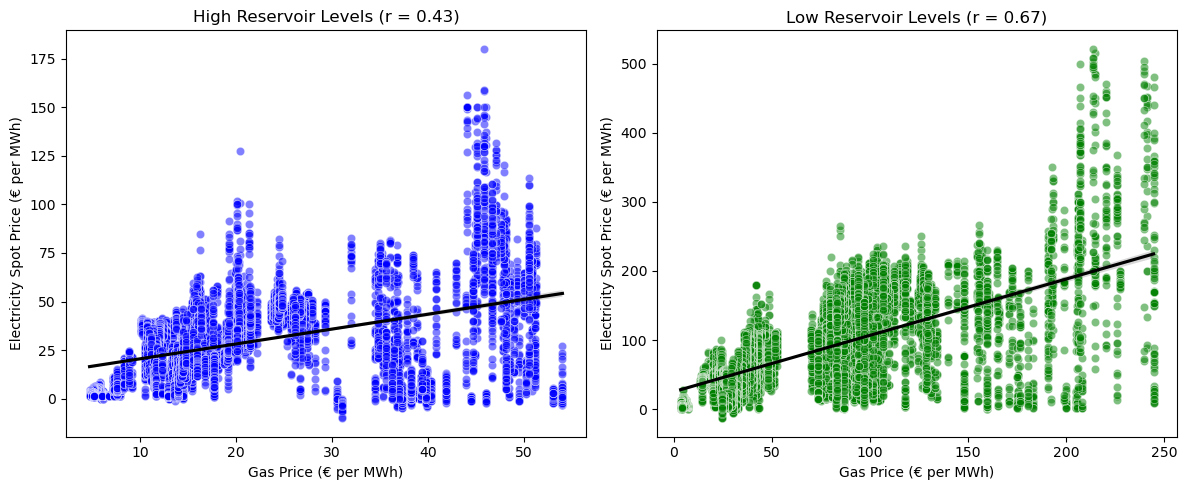

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load dataset
df = pd.read_csv("Electricity Price dataset.csv")

# Rename columns for clarity
df.rename(columns={"Reservoir level": "Reservoir_level", 
                   "Electricity_Spot price": "Spot_price",
                   "Gas_price": "Gas_price"}, inplace=True)

# Convert necessary columns to numeric
df["Gas_price"] = pd.to_numeric(df["Gas_price"], errors='coerce')
df["Spot_price"] = pd.to_numeric(df["Spot_price"], errors='coerce')
df["Reservoir_level"] = pd.to_numeric(df["Reservoir_level"], errors='coerce')

# Compute quartiles (25% and 75%)
q25 = df["Reservoir_level"].quantile(0.25)
q75 = df["Reservoir_level"].quantile(0.75)

# Categorize into High and Low (remove Medium category)
df["Reservoir_category"] = np.where(df["Reservoir_level"] <= q25, "Low",
                                    np.where(df["Reservoir_level"] >= q75, "High", "Medium"))

# Remove the "Medium" category
df_filtered = df[df["Reservoir_category"] != "Medium"]

# Separate datasets
high_reservoir = df_filtered[df_filtered["Reservoir_category"] == "High"]
low_reservoir = df_filtered[df_filtered["Reservoir_category"] == "Low"]

# Compute Pearson correlation for each category
corr_high, _ = pearsonr(high_reservoir["Gas_price"], high_reservoir["Spot_price"])
corr_low, _ = pearsonr(low_reservoir["Gas_price"], low_reservoir["Spot_price"])

# Display results
print(f"Correlation (Low Reservoir): {corr_low:.2f}")
print(f"Correlation (High Reservoir): {corr_high:.2f}")

# --- Visualization ---

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# High Reservoir Scatterplot
sns.scatterplot(x=high_reservoir["Gas_price"], y=high_reservoir["Spot_price"], 
                color="blue", alpha=0.5, ax=axes[0])
sns.regplot(x=high_reservoir["Gas_price"], y=high_reservoir["Spot_price"], 
            scatter=False, color="black", ax=axes[0])
axes[0].set_title(f"High Reservoir Levels (r = {corr_high:.2f})", fontsize=12)
axes[0].set_xlabel("Gas Price (€ per MWh)", fontsize=10)
axes[0].set_ylabel("Electricity Spot Price (€ per MWh)", fontsize=10)

# Low Reservoir Scatterplot
sns.scatterplot(x=low_reservoir["Gas_price"], y=low_reservoir["Spot_price"], 
                color="green", alpha=0.5, ax=axes[1])
sns.regplot(x=low_reservoir["Gas_price"], y=low_reservoir["Spot_price"], 
            scatter=False, color="black", ax=axes[1])
axes[1].set_title(f"Low Reservoir Levels (r = {corr_low:.2f})", fontsize=12)
axes[1].set_xlabel("Gas Price (€ per MWh)", fontsize=10)
axes[1].set_ylabel("Electricity Spot Price (€ per MWh)", fontsize=10)

plt.tight_layout()
plt.show()


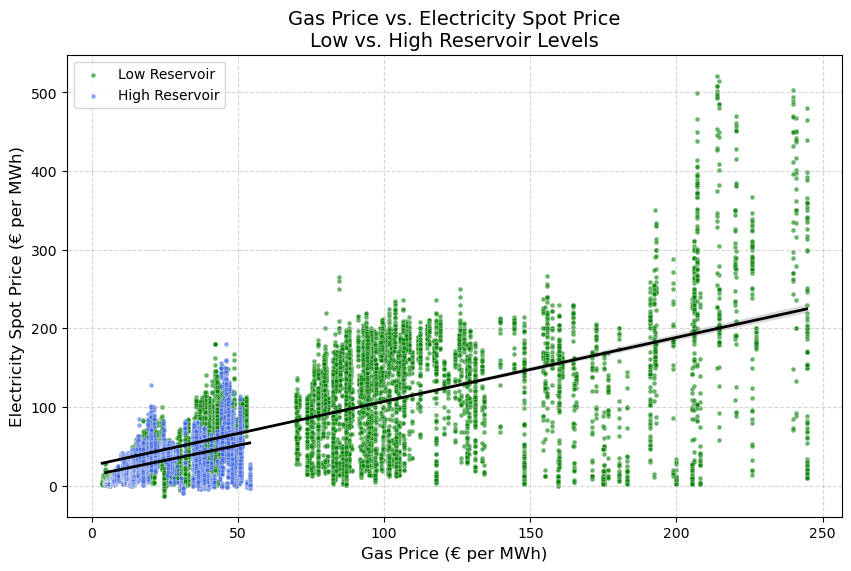

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define Figure Size
plt.figure(figsize=(10, 6))

# Scatterplot for Low Reservoir 
sns.scatterplot(x=low_reservoir["Gas_price"], y=low_reservoir["Spot_price"], 
                color='green', s=12, alpha=0.6, label="Low Reservoir")

# Scatterplot for High Reservoir 
sns.scatterplot(x=high_reservoir["Gas_price"], y=high_reservoir["Spot_price"], 
                color='royalblue', s=12, alpha=0.6, label="High Reservoir")

# Regression Line for Low Reservoir
sns.regplot(x=low_reservoir["Gas_price"], y=low_reservoir["Spot_price"], 
            scatter=False, color='black', line_kws={'linewidth': 2})

# Regression Line for High Reservoir
sns.regplot(x=high_reservoir["Gas_price"], y=high_reservoir["Spot_price"], 
            scatter=False, color='black', line_kws={'linewidth': 2})

# Titles and Labels
plt.title("Gas Price vs. Electricity Spot Price\nLow vs. High Reservoir Levels", fontsize=14)
plt.xlabel("Gas Price (€ per MWh)", fontsize=12)
plt.ylabel("Electricity Spot Price (€ per MWh)", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Show Plot
plt.show()


# QUESTION 2

## Pearson Correlation Computation

In [20]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Electricity Price dataset.csv", parse_dates=["Time Stamp"])

# Check actual column names in the dataset
print("Column Names in Dataset:", df.columns.tolist())

# Standardize column names (remove spaces, lowercase all)
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

# Rename specific columns if necessary
df.rename(columns={"electricity_spot_price": "spot_price",
                   "wind": "wind_power",
                   "precipitation": "rainfall"}, inplace=True)

# Ensure that the necessary columns exist
if "wind_power" not in df.columns or "rainfall" not in df.columns or "spot_price" not in df.columns:
    raise ValueError("Required columns not found. Check the dataset column names.")

# Ensure the necessary columns are numeric
df["wind_power"] = pd.to_numeric(df["wind_power"], errors='coerce')
df["rainfall"] = pd.to_numeric(df["rainfall"], errors='coerce')
df["spot_price"] = pd.to_numeric(df["spot_price"], errors='coerce')

# Extract year for grouping
df["year"] = df["time_stamp"].dt.year

# Compute yearly average correlations
yearly_corr_wind = df.groupby("year")[["spot_price", "wind_power"]].corr().unstack().iloc[:, 1]
yearly_corr_rain = df.groupby("year")[["spot_price", "rainfall"]].corr().unstack().iloc[:, 1]

# Display results
yearly_corr_values = pd.DataFrame({
    "Year": yearly_corr_wind.index,
    "Wind vs. Spot Price": yearly_corr_wind.values,
    "Rain vs. Spot Price": yearly_corr_rain.values
})

display(yearly_corr_values)


C:\Users\greth\AppData\Local\Temp\ipykernel_9528\3814112741.py:5: DtypeWarning: Columns (14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Electricity Price dataset.csv", parse_dates=["Time Stamp"])


Column Names in Dataset: ['Time Stamp', 'Oil_price_euro', 'Coal_price_euro', 'Reservoir level', 'Gas_price', 'Dollar price', 'Consumption', 'Production', 'Precipitation', 'Electrical Load', 'Electricity_Actual price', 'Wind', 'Temperature', 'Electricity_Spot price', 'hour', 'day', 'month', 'year', 'week', 'day_of_week']


,Year,Wind vs. Spot Price,Rain vs. Spot Price
0,2017,-0.363141,-0.116130
1,2018,-0.079769,-0.053396
2,2019,-0.000643,-0.092418
3,2020,0.031475,-0.015766
4,2021,-0.028792,-0.066721
5,2022,-0.222164,-0.080751
6,2023,-0.147810,-0.113888


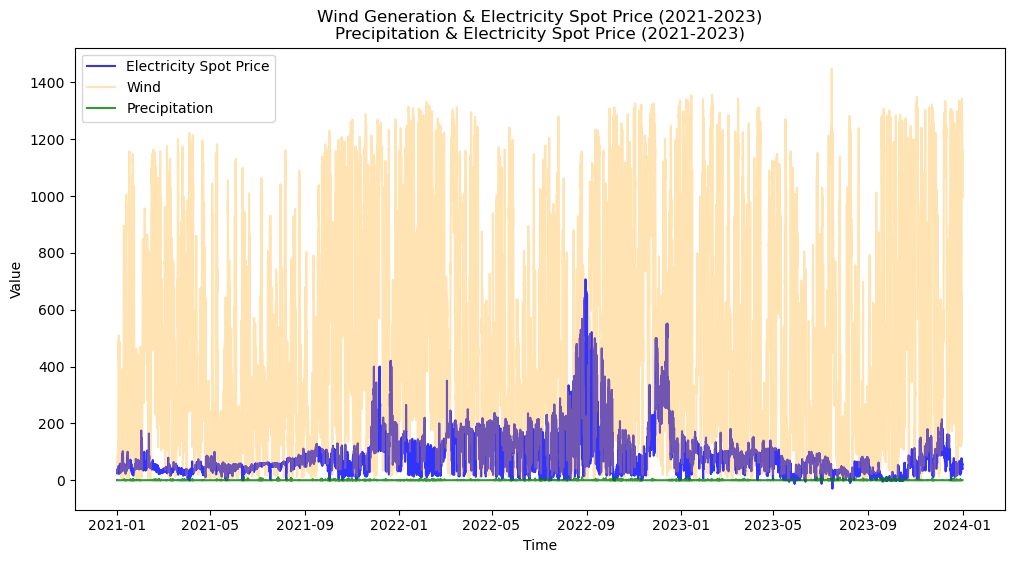

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Electricity Price dataset.csv", parse_dates=["Time Stamp"], low_memory=False)

# Rename column for consistency
df.rename(columns={"Time Stamp": "Time"}, inplace=True)

# Set the datetime column as the index
df.set_index("Time", inplace=True)

# Filter data for 2021-2023
df_filtered = df.loc["2021-01-01":"2023-12-31"]

# Plot the time series
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x=df_filtered.index, y=df_filtered["Electricity_Spot price"], label="Electricity Spot Price", color="blue", alpha=0.8)
sns.lineplot(data=df_filtered, x=df_filtered.index, y=df_filtered["Wind"], label="Wind", color="orange", alpha=0.3)
sns.lineplot(data=df_filtered, x=df_filtered.index, y=df_filtered["Precipitation"], label="Precipitation", color="green", alpha=0.8)

# Labels and title
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Wind Generation & Electricity Spot Price (2021-2023)\nPrecipitation & Electricity Spot Price (2021-2023)")
plt.legend()

# Show plot
plt.show()


C:\Users\greth\AppData\Local\Temp\ipykernel_9528\3922290380.py:6: DtypeWarning: Columns (14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Electricity Price dataset.csv", parse_dates=["Time Stamp"])


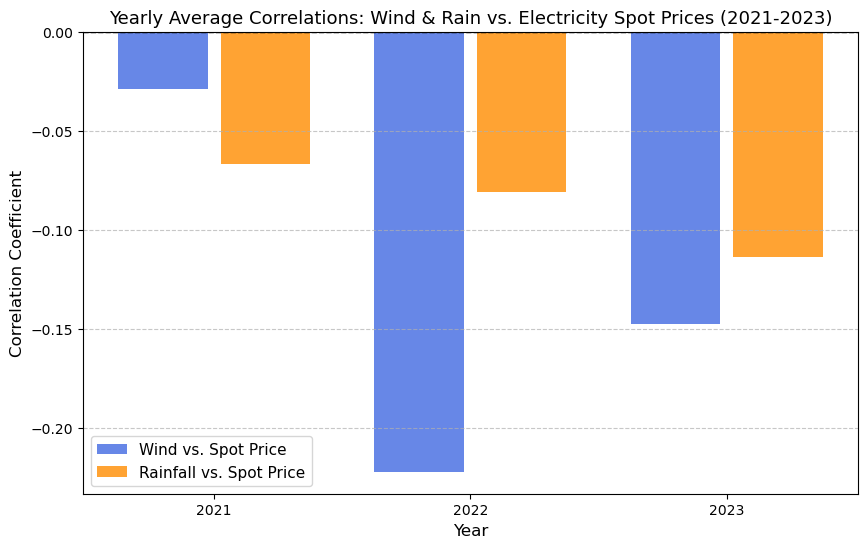

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Electricity Price dataset.csv", parse_dates=["Time Stamp"])

# Rename columns for consistency
df.rename(columns={"Electricity_Spot price": "Spot_price",
                   "Wind": "Wind_power",
                   "Precipitation": "Rainfall"}, inplace=True)

# Extract year
df["Year"] = df["Time Stamp"].dt.year

# Filter for the past three years (2021-2023)
df_filtered = df[df["Year"].between(2021, 2023)]

# Compute yearly average correlations
yearly_corr_wind = df_filtered.groupby("Year")[["Spot_price", "Wind_power"]].corr().unstack().iloc[:, 1]
yearly_corr_rain = df_filtered.groupby("Year")[["Spot_price", "Rainfall"]].corr().unstack().iloc[:, 1]

# --- Plot Bar Chart for Yearly Average Correlations ---
plt.figure(figsize=(10, 6))
bar_width = 0.35  # Adjusted for better spacing
years = yearly_corr_wind.index

# Plot bars without decimal shifts for clarity
plt.bar(years - 0.2, yearly_corr_wind, width=bar_width, label="Wind vs. Spot Price", color='royalblue', alpha=0.8)
plt.bar(years + 0.2, yearly_corr_rain, width=bar_width, label="Rainfall vs. Spot Price", color='darkorange', alpha=0.8)

# Reference line at zero for easy interpretation
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Title and labels
plt.title("Yearly Average Correlations: Wind & Rain vs. Electricity Spot Prices (2021-2023)", fontsize=13)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Correlation Coefficient", fontsize=12)
plt.xticks(years)  # Ensure correct year labels
plt.legend(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


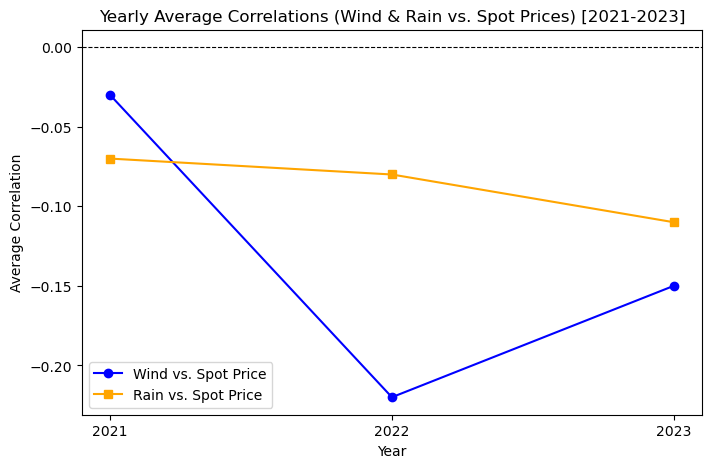

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data
years = np.array([2021, 2022, 2023])  # Ensure integer years
wind_correlation = np.array([-0.03, -0.22, -0.15])
rain_correlation = np.array([-0.07, -0.08, -0.11])

# Create figure and axis
fig, ax = plt.subplots(figsize=(8,5))

# Plot data
ax.plot(years, wind_correlation, marker='o', linestyle='-', color='blue', label='Wind vs. Spot Price')
ax.plot(years, rain_correlation, marker='s', linestyle='-', color='orange', label='Rain vs. Spot Price')

# Formatting the x-axis to show whole years without decimals
ax.set_xticks(years)  # Set only integer year values

# Labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Average Correlation")
ax.set_title("Yearly Average Correlations (Wind & Rain vs. Spot Prices) [2021-2023]")
ax.axhline(0, color='black', linestyle='dashed', linewidth=0.8)

# Add legend
ax.legend()

# Show plot
plt.show()


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the dataset
df = pd.read_csv("Electricity Price dataset.csv", parse_dates=["Time Stamp"])

# Extract year from timestamp
df["year"] = df["Time Stamp"].dt.year

# Filter for the last three years (2021-2023)
recent_df = df[df["year"].isin([2021, 2022, 2023])]

# Compute Pearson correlation
corr_wind, _ = pearsonr(recent_df["Wind"], recent_df["Electricity_Spot price"])
corr_rain, _ = pearsonr(recent_df["Precipitation"], recent_df["Electricity_Spot price"])

print("Correlation between Wind and Spot Prices (2021-2023):", corr_wind)
print("Correlation between Rainfall and Spot Prices (2021-2023):", corr_rain)


C:\Users\greth\AppData\Local\Temp\ipykernel_9528\2857616505.py:8: DtypeWarning: Columns (14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Electricity Price dataset.csv", parse_dates=["Time Stamp"])


Correlation between Wind and Spot Prices (2021-2023): -0.08963431766254701
Correlation between Rainfall and Spot Prices (2021-2023): -0.06845500592446048


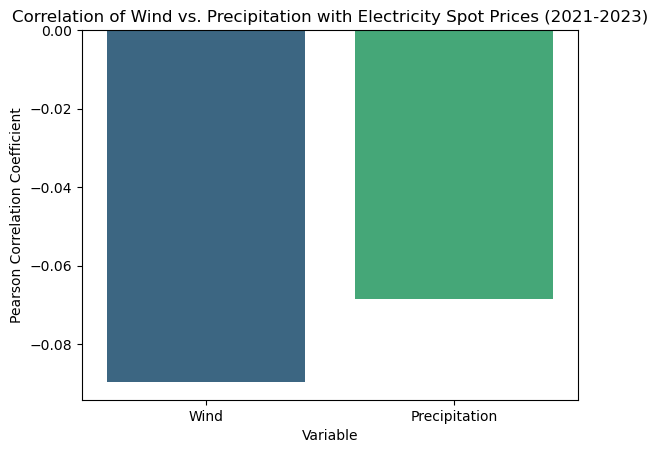

In [17]:
# Bar chart visualization
correlations = pd.DataFrame({
    "Variable": ["Wind", "Precipitation"],
    "Correlation": [corr_wind, corr_rain]
})

sns.barplot(x="Variable", y="Correlation", data=correlations, palette="viridis")
plt.title("Correlation of Wind vs. Precipitation with Electricity Spot Prices (2021-2023)")
plt.ylabel("Pearson Correlation Coefficient")
plt.xlabel("Variable")
plt.show()


# QUESTION 3

C:\Users\greth\AppData\Local\Temp\ipykernel_9528\2363291974.py:9: DtypeWarning: Columns (14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Electricity Price dataset.csv", parse_dates=["Time Stamp"])


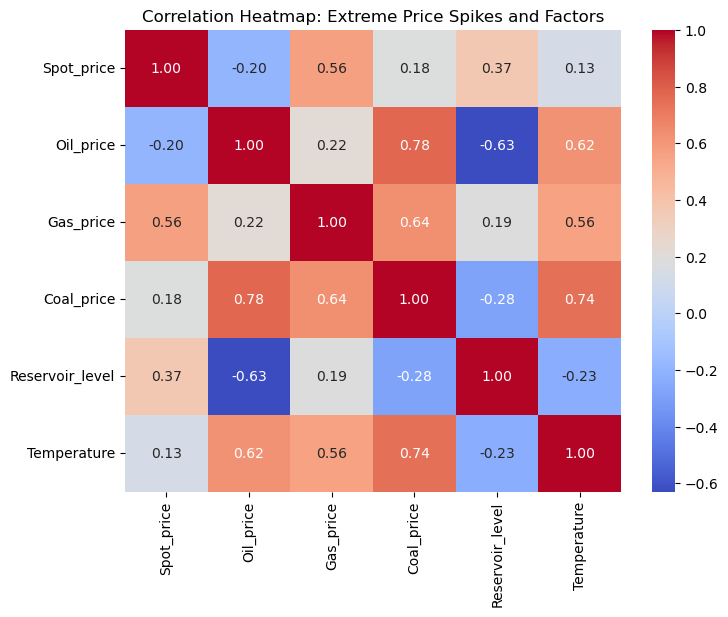

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the dataset

df = pd.read_csv("Electricity Price dataset.csv", parse_dates=["Time Stamp"])

# Rename columns for consistency
df.rename(columns={
    "Reservoir level": "Reservoir_level",
    "Electricity_Spot price": "Spot_price",
    "Oil_price_euro": "Oil_price",
    "Gas_price": "Gas_price",
    "Coal_price_euro": "Coal_price",
    "Temperature": "Temperature"
}, inplace=True)

# Define extreme price spikes (95th percentile)
threshold = df["Spot_price"].quantile(0.95)
df_spikes = df[df["Spot_price"] >= threshold]

# Correlation analysis
correlations = df_spikes[["Spot_price", "Oil_price", "Gas_price", "Coal_price", "Reservoir_level", "Temperature"]].corr()["Spot_price"]

# Regression analysis (Predicting price spikes based on global and local factors)
X = df_spikes[["Oil_price", "Gas_price", "Coal_price", "Reservoir_level", "Temperature"]]
X = sm.add_constant(X)  # Add constant for regression
y = df_spikes["Spot_price"]

model = sm.OLS(y, X).fit()
regression_summary = model.summary()

# Visualizing Correlations with Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_spikes[["Spot_price", "Oil_price", "Gas_price", "Coal_price", "Reservoir_level", "Temperature"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Extreme Price Spikes and Factors")
plt.show()

C:\Users\greth\AppData\Local\Temp\ipykernel_9528\221383038.py:5: DtypeWarning: Columns (14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Electricity Price dataset.csv", parse_dates=["Time Stamp"])


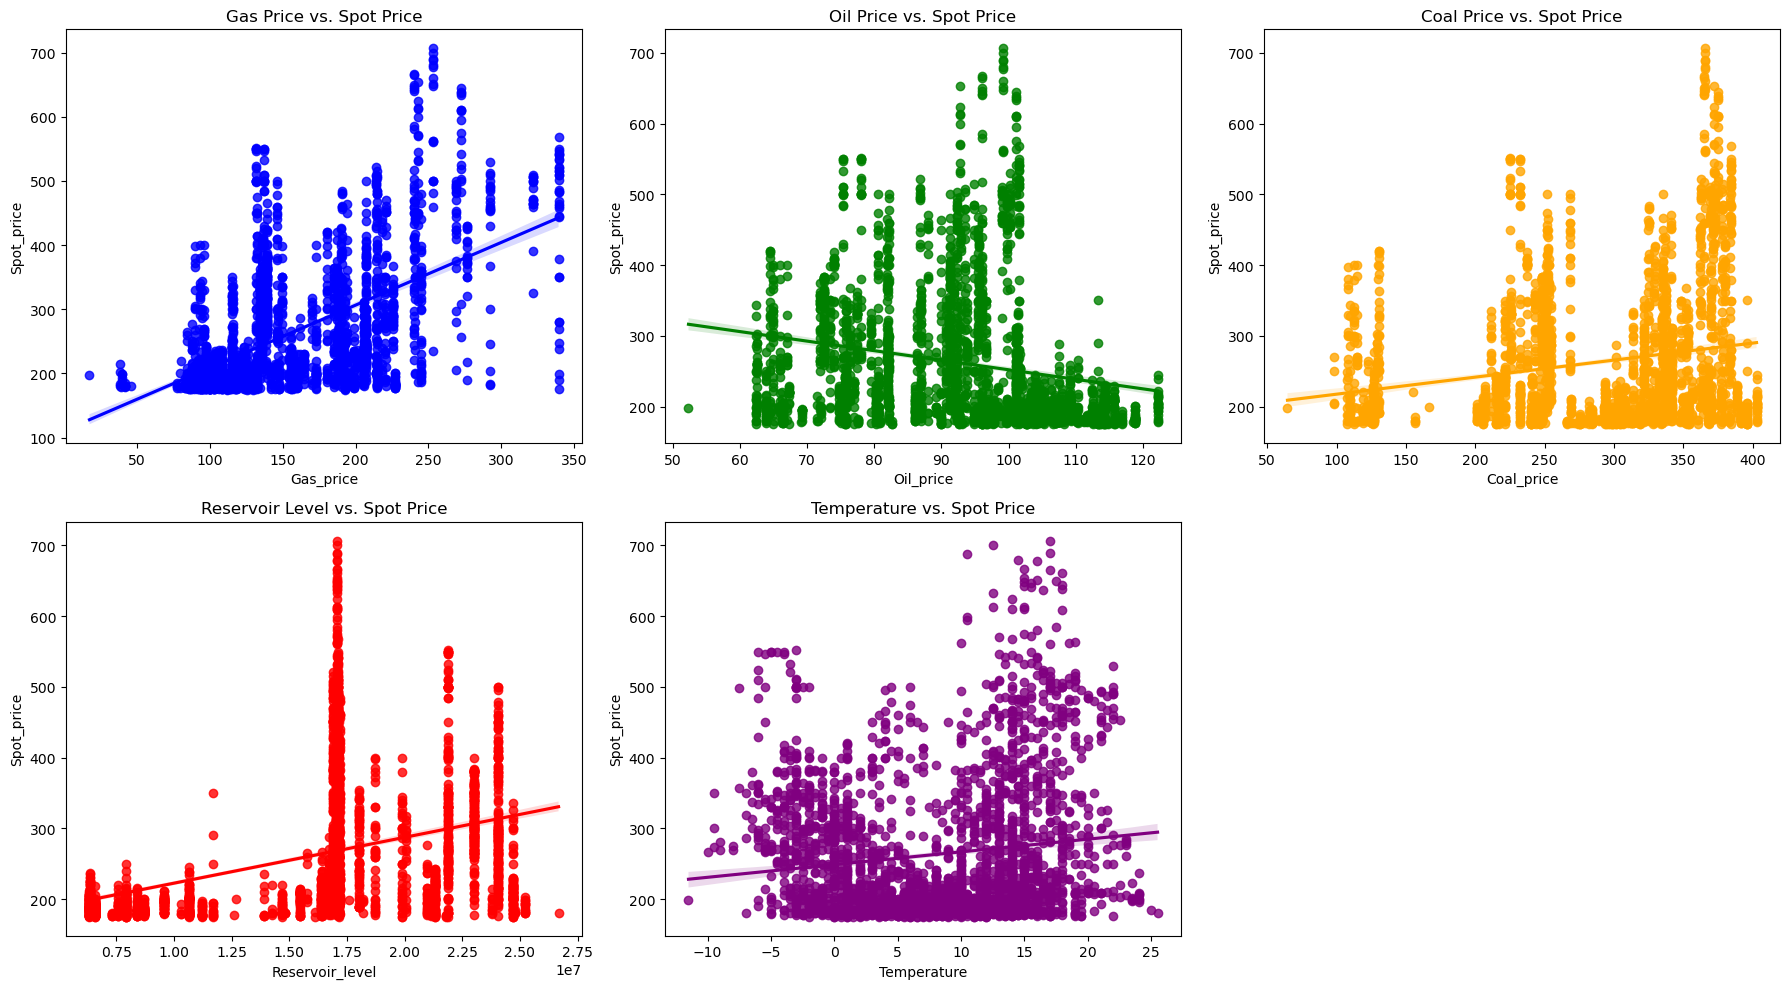

In [23]:
import pandas as pd

# Load the dataset again

df = pd.read_csv("Electricity Price dataset.csv", parse_dates=["Time Stamp"])

# Rename columns for consistency
df.rename(columns={
    "Reservoir level": "Reservoir_level",
    "Electricity_Spot price": "Spot_price",
    "Gas_price": "Gas_price",
    "Oil_price_euro": "Oil_price",
    "Coal_price_euro": "Coal_price",
    "Temperature": "Temperature"
}, inplace=True)

# Extract extreme electricity price spikes (e.g., top 5%)
extreme_threshold = df["Spot_price"].quantile(0.95)
extreme_prices_df = df[df["Spot_price"] >= extreme_threshold]

# Regenerate visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.regplot(x=extreme_prices_df["Gas_price"], y=extreme_prices_df["Spot_price"], ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Gas Price vs. Spot Price")

sns.regplot(x=extreme_prices_df["Oil_price"], y=extreme_prices_df["Spot_price"], ax=axes[0, 1], color="green")
axes[0, 1].set_title("Oil Price vs. Spot Price")

sns.regplot(x=extreme_prices_df["Coal_price"], y=extreme_prices_df["Spot_price"], ax=axes[0, 2], color="orange")
axes[0, 2].set_title("Coal Price vs. Spot Price")

sns.regplot(x=extreme_prices_df["Reservoir_level"], y=extreme_prices_df["Spot_price"], ax=axes[1, 0], color="red")
axes[1, 0].set_title("Reservoir Level vs. Spot Price")

sns.regplot(x=extreme_prices_df["Temperature"], y=extreme_prices_df["Spot_price"], ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Temperature vs. Spot Price")

# Remove empty subplot
fig.delaxes(axes[1, 2])

# Adjust layout and show plot
plt.tight_layout()
plt.show()


# QUESTION 4

In [13]:
#Sample Size
# Check the number of observations in each period
observations_count = {
    "Pre-2020": pre_2020.shape[0],
    "During 2020": during_2020.shape[0],
    "Post-2020": post_2020.shape[0]
}

# Display the number of observations in each group
observations_count


{'Pre-2020': 19200, 'During 2020': 8784, 'Post-2020': 26280}

In [15]:
# Check the unique years in the dataset to confirm if 2020 data exists
df["Time Stamp"] = pd.to_datetime(df["Time Stamp"])  # Ensure timestamp is in datetime format

# Extract the unique years in the dataset
unique_years = df["Time Stamp"].dt.year.unique()
unique_years


array([2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [33]:
# Mean Calculation
pre_2020.mean(), during_2020.mean(), post_2020.mean()



(40.56292292130208, 10.927553504781422, 84.87168187100458)

In [35]:
# Standard Deviation Calculation
pre_2020.std(), during_2020.std(), post_2020.std()

(9.704552062902048, 8.249482408270017, 79.12695460192822)

In [27]:
# Import the required function from statsmodels
from statsmodels.stats.weightstats import ztest

# Re-run the Z-test after ensuring the correct function is imported
z_stat_pre_vs_during, p_val_pre_vs_during = ztest(pre_2020, during_2020, alternative='two-sided')
z_stat_during_vs_post, p_val_during_vs_post = ztest(during_2020, post_2020, alternative='two-sided')

# Critical value for Z-test at α = 0.05 (two-tailed)
critical_value = 1.960

# Organize results into a DataFrame
z_test_results = pd.DataFrame({
    "Comparison": ["Pre-2020 vs During 2020", "During 2020 vs Post-2020"],
    "Z-Statistic": [z_stat_pre_vs_during, z_stat_during_vs_post],
    "Critical Value": [critical_value, critical_value],
    "P-Value": [p_val_pre_vs_during, p_val_during_vs_post],
    "Result": ["H0 Rejected" if abs(z) > critical_value else "H0 Not Rejected" for z in [z_stat_pre_vs_during, z_stat_during_vs_post]]
})

# Display the updated results
z_test_results


,Comparison,Z-Statistic,Critical Value,P-Value,Result
0,Pre-2020 vs During 2020,248.117580,1.96,0.0,H0 Rejected
1,During 2020 vs Post-2020,-87.424643,1.96,0.0,H0 Rejected


In [29]:
# Perform Z-test for Pre-2020 vs Post-2020 directly
z_stat_pre_vs_post, p_val_pre_vs_post = ztest(pre_2020, post_2020, alternative='two-sided')

# Add new comparison to results
z_test_results.loc[len(z_test_results)] = [
    "Pre-2020 vs Post-2020", z_stat_pre_vs_post, critical_value, p_val_pre_vs_post, 
    "H0 Rejected" if abs(z_stat_pre_vs_post) > critical_value else "H0 Not Rejected"
]

# Display the updated results
z_test_results

,Comparison,Z-Statistic,Critical Value,P-Value,Result
0,Pre-2020 vs During 2020,248.117580,1.96,0.0,H0 Rejected
1,During 2020 vs Post-2020,-87.424643,1.96,0.0,H0 Rejected
2,Pre-2020 vs Post-2020,-77.168698,1.96,0.0,H0 Rejected


C:\Users\grela\AppData\Local\Temp\ipykernel_33824\1300145833.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Period', y='Correlation Coefficient', data=df, palette='Blues')


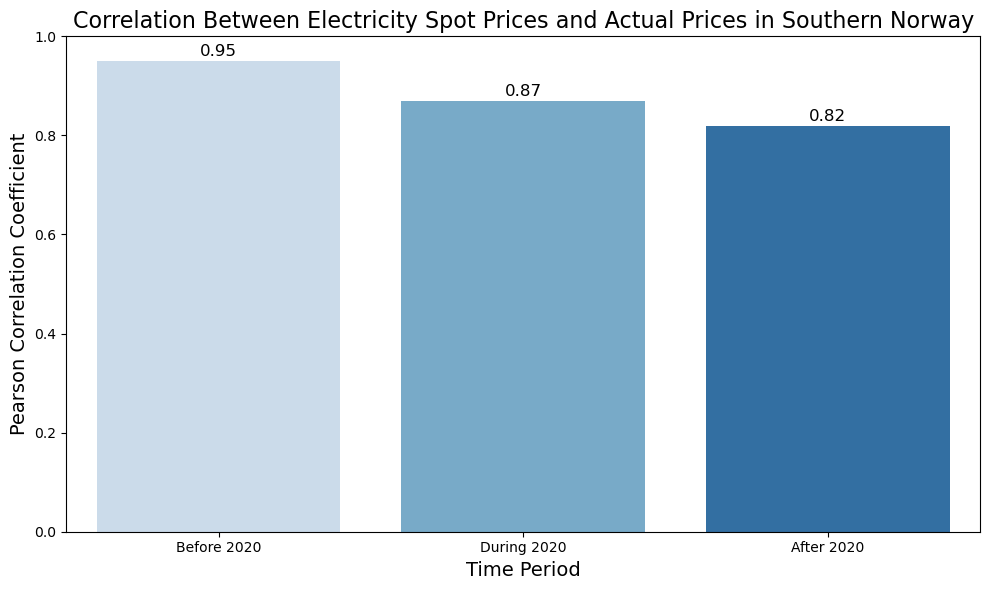

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data preparation
data = {
    'Period': ['Before 2020', 'During 2020', 'After 2020'],
    'Correlation Coefficient': [0.95, 0.87, 0.82]
}

df = pd.DataFrame(data)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Period', y='Correlation Coefficient', data=df, palette='Blues')

# Adding titles and labels
plt.title('Correlation Between Electricity Spot Prices and Actual Prices in Southern Norway', fontsize=16)
plt.xlabel('Time Period', fontsize=14)
plt.ylabel('Pearson Correlation Coefficient', fontsize=14)
plt.ylim(0, 1)  # Set y-axis limits

# Show the correlation values on top of the bars
for index, value in enumerate(df['Correlation Coefficient']):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\grela\AppData\Local\Temp\ipykernel_33824\606645737.py:8: DtypeWarning: Columns (14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Electricity Price dataset.csv", parse_dates=["Time Stamp"])


Correlation Before 2020: 0.9468622127547166
Correlation During 2020: 0.8694614282849223
Correlation After 2020: 0.8165628979115751


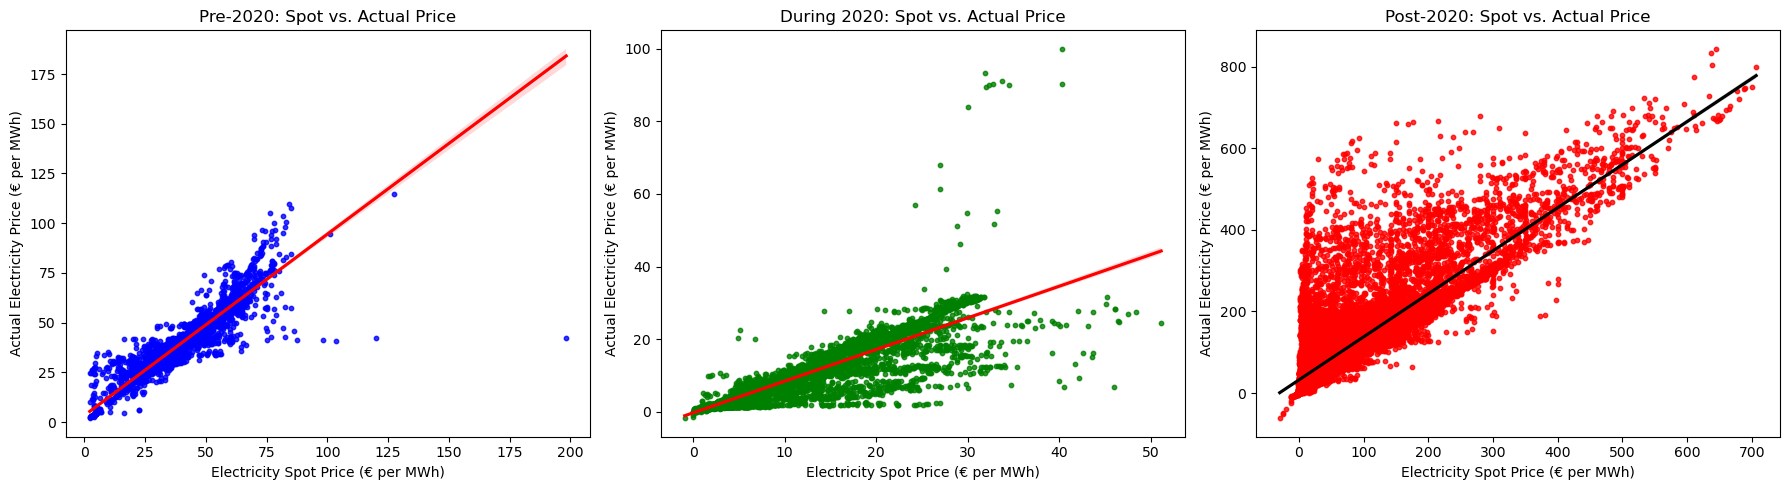

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load dataset
df = pd.read_csv("Electricity Price dataset.csv", parse_dates=["Time Stamp"])

# Renaming for convenience
df.rename(columns={"Electricity_Spot price": "Spot_price",
                   "Electricity_Actual price": "Actual_price"}, inplace=True)

# Extract Year
df["year"] = df["Time Stamp"].dt.year

# Split the data into Pre-2020, During 2020, and Post-2020
pre_2020 = df[df["year"] < 2020]
during_2020 = df[df["year"] == 2020]
post_2020 = df[df["year"] > 2020]

# Compute Pearson Correlation for each period
corr_pre, _ = pearsonr(pre_2020["Spot_price"], pre_2020["Actual_price"])
corr_during, _ = pearsonr(during_2020["Spot_price"], during_2020["Actual_price"])
corr_post, _ = pearsonr(post_2020["Spot_price"], post_2020["Actual_price"])

print("Correlation Before 2020:", corr_pre)
print("Correlation During 2020:", corr_during)
print("Correlation After 2020:", corr_post)

# Scatterplots with trendlines
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Pre-2020
sns.regplot(x=pre_2020["Spot_price"], y=pre_2020["Actual_price"], ax=axes[0], scatter_kws={"s": 10}, color='blue', line_kws={"color": "red"})
axes[0].set_title("Pre-2020: Spot vs. Actual Price")
axes[0].set_xlabel("Electricity Spot Price (€ per MWh)")
axes[0].set_ylabel("Actual Electricity Price (€ per MWh)")

# During 2020
sns.regplot(x=during_2020["Spot_price"], y=during_2020["Actual_price"], ax=axes[1], scatter_kws={"s": 10}, color='green', line_kws={"color": "red"})
axes[1].set_title("During 2020: Spot vs. Actual Price")
axes[1].set_xlabel("Electricity Spot Price (€ per MWh)")
axes[1].set_ylabel("Actual Electricity Price (€ per MWh)")

# Post-2020
sns.regplot(x=post_2020["Spot_price"], y=post_2020["Actual_price"], ax=axes[2], scatter_kws={"s": 10}, color='red', line_kws={"color": "black"})
axes[2].set_title("Post-2020: Spot vs. Actual Price")
axes[2].set_xlabel("Electricity Spot Price (€ per MWh)")
axes[2].set_ylabel("Actual Electricity Price (€ per MWh)")

plt.tight_layout()
plt.show()


C:\Users\grela\AppData\Local\Temp\ipykernel_33824\3292845181.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_filtered["Period"], y=df_filtered["Electricity_Spot price"], palette=["blue", "orange", "green"])


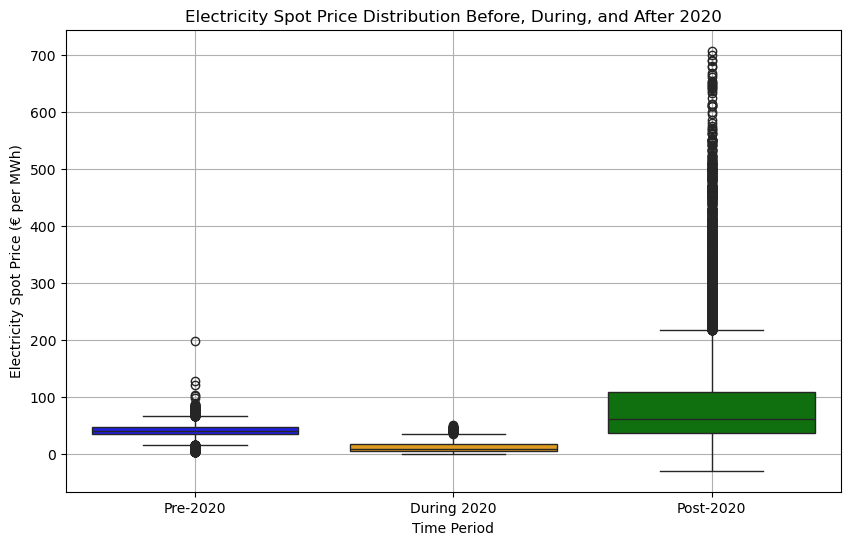

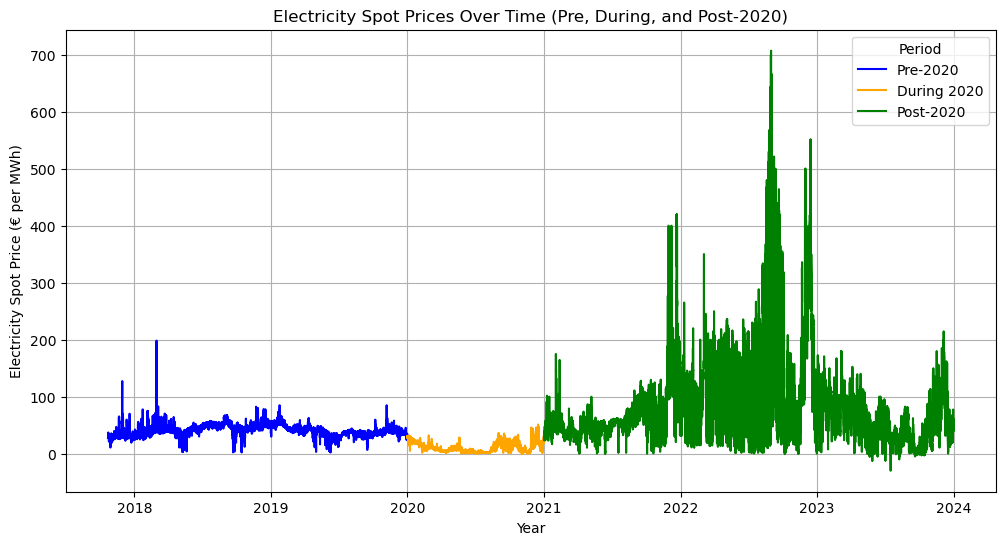

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column for time period classification
df["Period"] = df["Time Stamp"].dt.year.map(lambda x: "Pre-2020" if x < 2020 else ("During 2020" if x == 2020 else "Post-2020"))

# Filter data to avoid excessive points
df_filtered = df[df["Period"].notna()]

# Create a box plot to compare electricity spot prices across periods
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered["Period"], y=df_filtered["Electricity_Spot price"], palette=["blue", "orange", "green"])
plt.xlabel("Time Period")
plt.ylabel("Electricity Spot Price (€ per MWh)")
plt.title("Electricity Spot Price Distribution Before, During, and After 2020")
plt.grid(True)

# Show the box plot
plt.show()

# Create a line plot to observe price trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_filtered["Time Stamp"], y=df_filtered["Electricity_Spot price"], hue=df_filtered["Period"], palette=["blue", "orange", "green"])
plt.xlabel("Year")
plt.ylabel("Electricity Spot Price (€ per MWh)")
plt.title("Electricity Spot Prices Over Time (Pre, During, and Post-2020)")
plt.legend(title="Period")
plt.grid(True)

# Show the line plot
plt.show()


# QUESTION 5

C:\Users\greth\AppData\Local\Temp\ipykernel_9528\3154681945.py:6: DtypeWarning: Columns (14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Electricity Price dataset.csv")


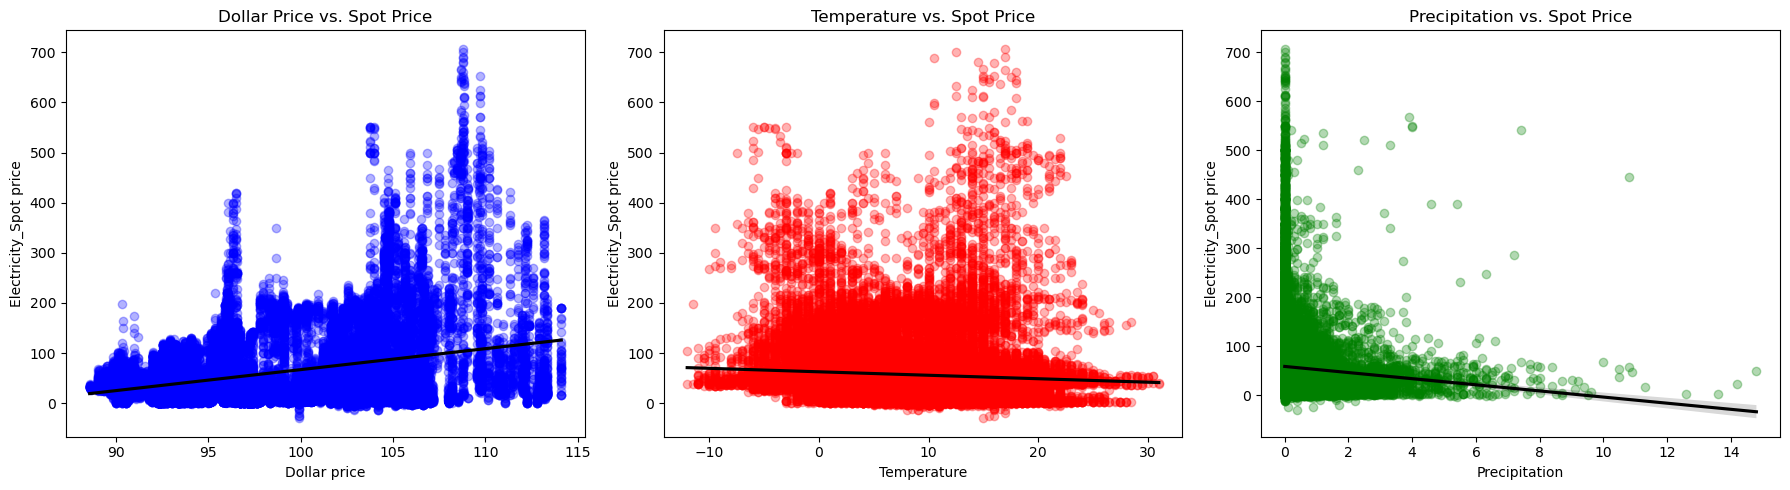

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data (Replace with actual dataset)
df = pd.read_csv("Electricity Price dataset.csv")

# Set figure size
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter Plot with Trend Line for Dollar Price vs Spot Price
sns.regplot(x=df["Dollar price"], y=df["Electricity_Spot price"], ax=axes[0], color="blue",
            scatter_kws={"alpha":0.3}, line_kws={"color": "black"})
axes[0].set_title("Dollar Price vs. Spot Price")

# Scatter Plot with Trend Line for Temperature vs Spot Price
sns.regplot(x=df["Temperature"], y=df["Electricity_Spot price"], ax=axes[1], color="red",
            scatter_kws={"alpha":0.3}, line_kws={"color": "black"})
axes[1].set_title("Temperature vs. Spot Price")

# Scatter Plot with Trend Line for Precipitation vs Spot Price
sns.regplot(x=df["Precipitation"], y=df["Electricity_Spot price"], ax=axes[2], color="green",
            scatter_kws={"alpha":0.3}, line_kws={"color": "black"})
axes[2].set_title("Precipitation vs. Spot Price")

plt.tight_layout()
plt.show()


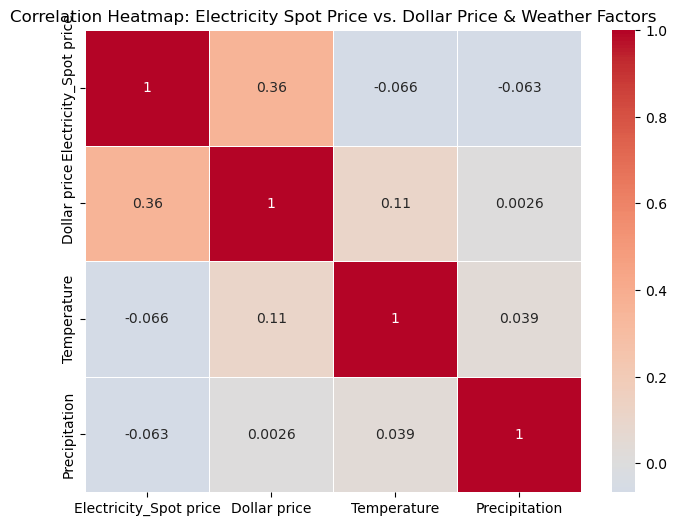

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select relevant variables
corr_matrix = df[["Electricity_Spot price", "Dollar price", "Temperature", "Precipitation"]].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap: Electricity Spot Price vs. Dollar Price & Weather Factors")
plt.show()


C:\Users\greth\AppData\Local\Temp\ipykernel_9528\1984026568.py:7: DtypeWarning: Columns (14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\greth\OneDrive\Desktop\NOROFF-DATA SCIENC\2ND YEAR\STATS\PROJECT\Electricity Price dataset.csv",


Columns in dataset: Index(['Time Stamp', 'Oil_price_euro', 'Coal_price_euro', 'Reservoir level',
       'Gas_price', 'Dollar price', 'Consumption', 'Production',
       'Precipitation', 'Electrical Load', 'Electricity_Actual price', 'Wind',
       'Temperature', 'Electricity_Spot price', 'hour', 'day', 'month', 'year',
       'week', 'day_of_week'],
      dtype='object')

Correlation Table for Q5:
          Factor  Correlation with Spot Price
0  Dollar Price                     0.355465
1      Rainfall                    -0.062705
2   Temperature                    -0.066120


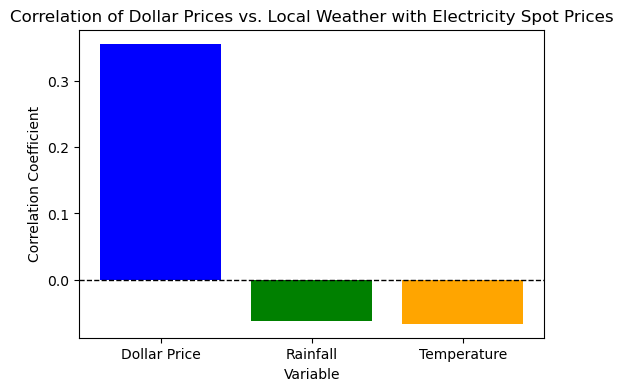

In [30]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset with dtype specification to handle mixed types
df = pd.read_csv(r"C:\Users\greth\OneDrive\Desktop\NOROFF-DATA SCIENC\2ND YEAR\STATS\PROJECT\Electricity Price dataset.csv", 
                 parse_dates=["Time Stamp"])

# Display column names to confirm correct names
print("Columns in dataset:", df.columns)

# Rename columns for consistency
df.rename(columns={"Electricity_Spot price": "Spot_price",
                   "Electricity_Actual price": "Actual_price"}, inplace=True)

# Ensure numeric data types
df["Spot_price"] = pd.to_numeric(df["Spot_price"], errors='coerce')
df["Actual_price"] = pd.to_numeric(df["Actual_price"], errors='coerce')




# Rename columns for consistency
df.rename(columns={"Dollar price": "Dollar_price",
                   "Precipitation": "Rainfall",
                   "Temperature": "Temperature"}, inplace=True)

# Ensure numeric data types
df["Dollar_price"] = pd.to_numeric(df["Dollar_price"], errors='coerce')
df["Rainfall"] = pd.to_numeric(df["Rainfall"], errors='coerce')
df["Temperature"] = pd.to_numeric(df["Temperature"], errors='coerce')
df["Spot_price"] = pd.to_numeric(df["Spot_price"], errors='coerce')

# Compute correlation coefficients
corr_dollar = df["Dollar_price"].corr(df["Spot_price"])
corr_rainfall = df["Rainfall"].corr(df["Spot_price"])
corr_temperature = df["Temperature"].corr(df["Spot_price"])

# Create table
correlation_table = pd.DataFrame({
    "Factor": ["Dollar Price", "Rainfall", "Temperature"],
    "Correlation with Spot Price": [corr_dollar, corr_rainfall, corr_temperature]
})

print("\nCorrelation Table for Q5:\n", correlation_table)

# Bar chart visualization
plt.figure(figsize=(6, 4))
plt.bar(["Dollar Price", "Rainfall", "Temperature"], [corr_dollar, corr_rainfall, corr_temperature], color=['blue', 'green', 'orange'])
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Variable")
plt.ylabel("Correlation Coefficient")
plt.title("Correlation of Dollar Prices vs. Local Weather with Electricity Spot Prices")
plt.show()


## SPEARMAN RANK

In [40]:
import pandas as pd
from scipy.stats import spearmanr

# Load the dataset
df = pd.read_csv("Electricity Price Dataset.csv", low_memory=False)

# Convert Time Stamp to datetime format
df["Time Stamp"] = pd.to_datetime(df["Time Stamp"])

# Select only relevant columns for analysis
columns_of_interest = ["Dollar price", "Temperature", "Precipitation", "Electricity_Spot price"]

# Ensure the selected columns exist in the dataset and drop missing values
df_selected = df[columns_of_interest].dropna()

# Compute Spearman correlation for the given question
spearman_results = {
    "Dollar Price": spearmanr(df_selected["Dollar price"], df_selected["Electricity_Spot price"], nan_policy='omit').correlation,
    "Temperature": spearmanr(df_selected["Temperature"], df_selected["Electricity_Spot price"], nan_policy='omit').correlation,
    "Precipitation": spearmanr(df_selected["Precipitation"], df_selected["Electricity_Spot price"], nan_policy='omit').correlation
}

# Convert results to DataFrame
spearman_df = pd.DataFrame(spearman_results.items(), columns=["Variable", "Spearman Correlation"])

# Print results
print(spearman_df)


        Variable  Spearman Correlation
0   Dollar Price              0.172633
1    Temperature             -0.111814
2  Precipitation             -0.127495


In [42]:
import pandas as pd

# Given Spearman correlation results
spearman_values = {
    "Dollar Price": 0.172633,
    "Temperature": -0.111814,
    "Precipitation": -0.127495
}

# Convert to absolute values for magnitude comparison
absolute_values = {key: abs(value) for key, value in spearman_values.items()}

# Compute the total sum of absolute values
total = sum(absolute_values.values())

# Compute percentage contribution of each factor
percentage_values = {key: (value / total) * 100 for key, value in absolute_values.items()}

# Convert to DataFrame for easy display
percentage_df = pd.DataFrame(percentage_values.items(), columns=["Variable", "Percentage Contribution"])

# Print results
print(percentage_df)


        Variable  Percentage Contribution
0   Dollar Price                41.907113
1    Temperature                27.143142
2  Precipitation                30.949745


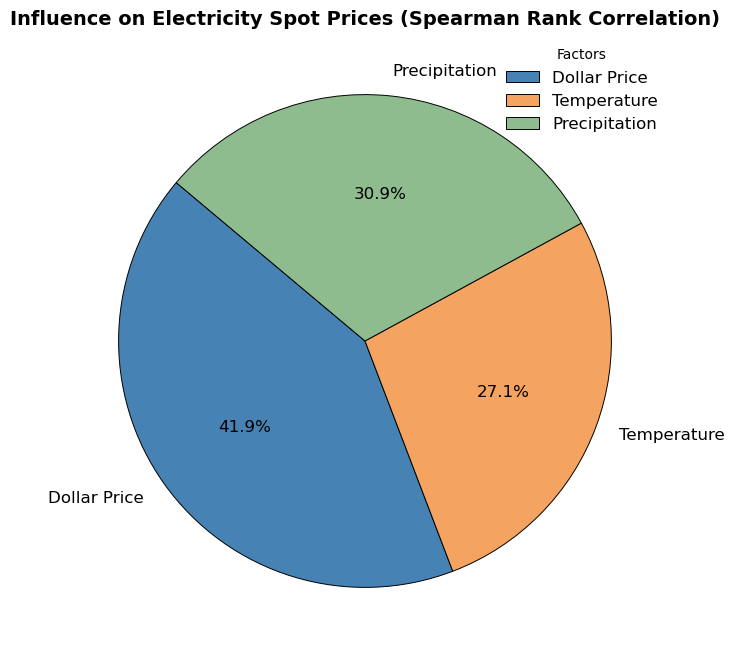

In [44]:
import matplotlib.pyplot as plt

# Updated Spearman correlation results (reflecting correct values)
labels = ["Dollar Price", "Temperature", "Precipitation"]
correlations = [0.172633, -0.111814, -0.127495]  # Spearman correlation values

# Convert correlations to absolute values for visualization
absolute_correlations = [abs(value) for value in correlations]

# Define a professional color scheme with neutral and elegant tones
colors = ['steelblue', 'sandybrown', 'darkseagreen']

# Generate pie chart with professional design
plt.figure(figsize=(8, 8))
plt.pie(absolute_correlations, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.7}, textprops={'fontsize': 12})

# Add a legend with a clean, minimalistic design
plt.legend(labels, title="Factors", loc="upper right", fontsize=12, frameon=False)

# Improve title clarity and formatting
plt.title("Influence on Electricity Spot Prices (Spearman Rank Correlation)", fontsize=14, fontweight='semibold')

# Display the chart
plt.show()
